## Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

# Making a random dataset with 10 features

In [1]:
import pandas as pd
import numpy as np
import random as rd
import sklearn.preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
gene=['gene'+str(i) for i in range(1,101)]
wt=['wt'+str(i) for i in range(1,6)]
ko=['ko'+str(i) for i in range(1,6)]

In [3]:
df=pd.DataFrame(columns=[*wt,*ko],index=gene)

In [4]:
df

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
gene96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
for gene in df.index:
    df.loc[gene,'wt1':'wt5']=np.random.poisson(lam=rd.randrange(10,1000),size=5)
    df.loc[gene,'ko1':'ko5']=np.random.poisson(lam=rd.randrange(10,1000),size=5)
    

In [12]:
df.head(10)

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,210,203,205,199,199,16,20,18,19,12
gene2,208,188,170,188,181,626,605,544,592,552
gene3,411,475,449,474,456,311,303,323,323,337
gene4,348,330,310,344,335,78,77,72,60,76
gene5,628,573,606,579,619,621,628,635,608,611
gene6,658,657,677,637,635,424,349,339,381,386
gene7,810,832,835,797,836,894,933,929,894,961
gene8,395,370,363,344,353,103,113,112,119,98
gene9,473,475,456,445,488,834,796,763,812,790
gene10,304,303,280,286,308,245,242,232,217,225


In [13]:
df.shape

(100, 10)

## scaling the data since it is scattered too much.

In [14]:
scaled_df=sklearn.preprocessing.scale(df.T)

In [15]:
scaled_df

array([[ 1.07226807, -0.88779226,  0.35791392,  1.10836317,  0.88007464,
         1.022404  , -1.14155762,  1.22766456, -0.95939909,  1.17900182,
        -1.00888464, -1.03412376,  0.37404235,  1.12107309, -0.93405442,
         1.40801843, -1.1484998 , -1.75155683,  0.92346539, -0.55733873,
         0.02895511,  1.17329669, -1.07529669,  0.78687214,  0.86137829,
         1.28126846, -0.98792227, -1.00722877,  0.89945422, -1.08023754,
        -1.06336966,  1.07563621, -0.90737047, -1.22463529, -1.02000263,
        -1.36101221, -1.00665365, -1.01043767,  1.36300534,  0.99968848,
         0.95990468, -1.27260649,  0.8698027 , -1.1050243 ,  0.10523342,
        -0.91442116, -1.2682486 , -0.98547274,  1.42138044,  0.03323908,
        -0.84713243,  0.39938344,  0.94560669,  0.58949252,  0.90554684,
        -0.87496488,  1.19729449,  0.72191378, -1.11954841, -0.89841629,
        -1.22089643,  1.02365809,  0.99006142, -1.01894865, -0.79943256,
        -0.57141828, -0.99633549, -1.01973445,  1.0

In [22]:
# making object of PCA where n_components decides into how many features we need to convert 10 features of above dataset.
pca=PCA(n_components=5)

In [23]:
# applying fit and transform
pca_data=pca.fit_transform(scaled_df)

In [24]:
#transformed data
pca_data

array([[-9.27252076, -1.67847692, -0.85646228,  1.86546704, -2.00337335],
       [-9.37664855,  2.68299889, -2.03682037, -0.13263423,  0.03429545],
       [-8.99043798, -2.6078893 ,  0.42548946, -2.11754175,  0.64885195],
       [-9.89422777,  2.15166086,  2.61620145, -0.11003994,  0.80597092],
       [-8.93975523, -0.68851392, -0.13264071,  0.60473657,  0.46439577],
       [ 9.10840154, -0.40886734, -2.57746673,  1.03222134,  2.35931607],
       [ 9.14949803, -1.19290801, -0.05360618, -1.6310694 , -1.17755059],
       [ 9.43742888,  1.81055106, -0.45601551, -0.52432111, -2.10958552],
       [ 8.83084044,  0.43411581,  0.71315606, -1.54490022,  0.7407998 ],
       [ 9.9474214 , -0.50267114,  2.35816481,  2.5580817 ,  0.2368795 ]])

In [25]:
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PC' + str(x) for x in range(1,len(per_var)+1)]

In [26]:
labels

['PC1', 'PC2', 'PC3', 'PC4', 'PC5']

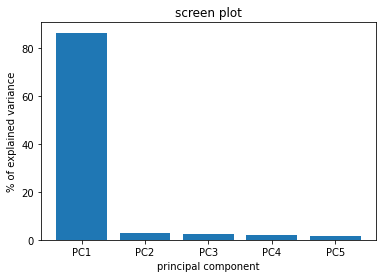

In [28]:
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel("% of explained variance")
plt.xlabel('principal component')
plt.title("screen plot")
plt.show()

In [29]:
pca_df=pd.DataFrame(pca_data,index=[*wt,*ko],columns=labels)


# Final converted dataset

In [30]:
pca_df

,PC1,PC2,PC3,PC4,PC5
wt1,-9.272521,-1.678477,-0.856462,1.865467,-2.003373
wt2,-9.376649,2.682999,-2.036820,-0.132634,0.034295
wt3,-8.990438,-2.607889,0.425489,-2.117542,0.648852
wt4,-9.894228,2.151661,2.616201,-0.110040,0.805971
wt5,-8.939755,-0.688514,-0.132641,0.604737,0.464396
ko1,9.108402,-0.408867,-2.577467,1.032221,2.359316
ko2,9.149498,-1.192908,-0.053606,-1.631069,-1.177551
ko3,9.437429,1.810551,-0.456016,-0.524321,-2.109586
ko4,8.830840,0.434116,0.713156,-1.544900,0.740800
ko5,9.947421,-0.502671,2.358165,2.558082,0.236879
